# Experiments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simuleringer vs teoretisk.....

Det er alt for bøvlet at implementere alt for meget aggregeringsalgoritme på platformen, så jeg holder mig til den meget simpel: min, max og gennemsnit.. Så bruger jeg den til at simulere noget scenarier/topologier som vi kan bruge til at argumentere hvorfor aggregering er smart (RX/TX-power, hvor meget data der skal sendes osv osv osv).. Når det så kommer til at simulere den egentlige aggregering (med forskellige distributioner), så syntes jeg vi gør det i python.. det gør ikke nogen forskel anyways og det tager 5 min at implementere i python.. 

Det vil sige at jeg har lavet alle eksperimenterne med uniform fordelt random samples og min/max/average aggregering og i øvrigt samme samplingstid.. 

Alle eksperimenterne er lavet med og uden aggregering, sådan det er sammenlignligt.. 

## Topologies 

#### Topology 1: Clusters

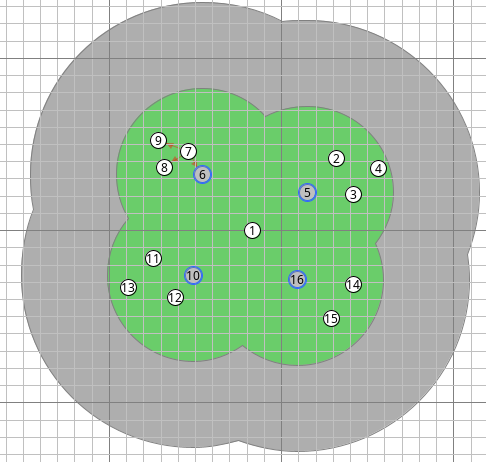
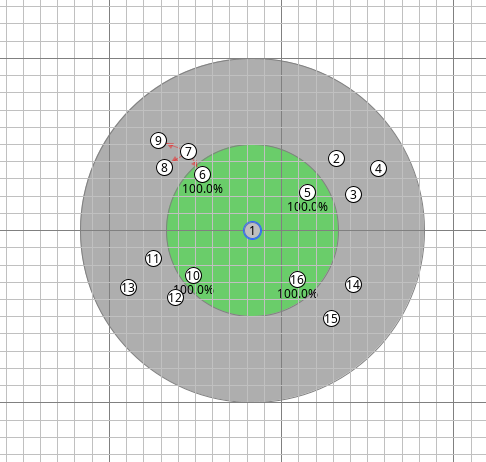

In [2]:
def logfileFormat(path): 
    # Import log file
    log = pd.read_csv(path, sep="\t", header=None)
    log.columns = ["time", 'mote', "message"]

    log[['logger', 'message']] = log['message'].str.split(']' ,expand=True)
    log['logger'] = log['logger'].str.replace('[', '')
    log['message'] = log['message'].str.replace(' - ', '')
    log['mote'] = log['mote'].str.replace('ID:', '')

    #Format from time format to seconds 
    log['time'] = pd.to_datetime(log['time'],format='%M:%S.%f')

    return log

### Experiment 1

In [3]:
log = logfileFormat('Experiment 1/loglistener.txt')

##### Time till connected in DAG

In [4]:
# Find messages where mote is writing "Found DAG"
foundDAG = log[log['message'].str.contains("Found DAG")]
foundDAG

,time,mote,message,logger
89,1900-01-01 00:00:00.717,1,Found DAG,INFO: WSN
263,1900-01-01 00:00:03.575,6,Found DAG,INFO: WSN
274,1900-01-01 00:00:03.797,16,Found DAG,INFO: WSN
276,1900-01-01 00:00:03.880,10,Found DAG,INFO: WSN
281,1900-01-01 00:00:04.039,5,Found DAG,INFO: WSN
741,1900-01-01 00:00:21.397,8,Found DAG,INFO: WSN
743,1900-01-01 00:00:21.514,11,Found DAG,INFO: WSN
753,1900-01-01 00:00:21.726,7,Found DAG,INFO: WSN
755,1900-01-01 00:00:21.774,14,Found DAG,INFO: WSN
757,1900-01-01 00:00:21.786,15,Found DAG,INFO: WSN


##### Ruter

In [5]:
# Import locations of motes from csc file (in motes, tags: id, <pos x=_ y=_ >)
locations = pd.read_xml('../Cooja Simulations/Topology1.csc', xpath='//mote/interface_config/pos')
locations.columns = ['x', 'y']
locations.index.name = 'id'

locations

,x,y
id,,
0,182.868349,99.938360
1,231.714222,58.193149
2,241.694438,79.113453
3,252.564198,59.946702
4,214.956384,77.864185
5,154.339143,67.644727
6,146.066205,54.124475
7,132.250579,63.109481
8,128.794164,47.935769


#### Netværksdata

Jeg har eksporteret netværksdata til en pcap fil der kan analyseres med wireshark.. her er lidt af de ting jeg fandt ud af man kan se statistik på: 

(Og helt sikkert også noget med tabte pakker, men det er der vist ikke i det eksempel her)

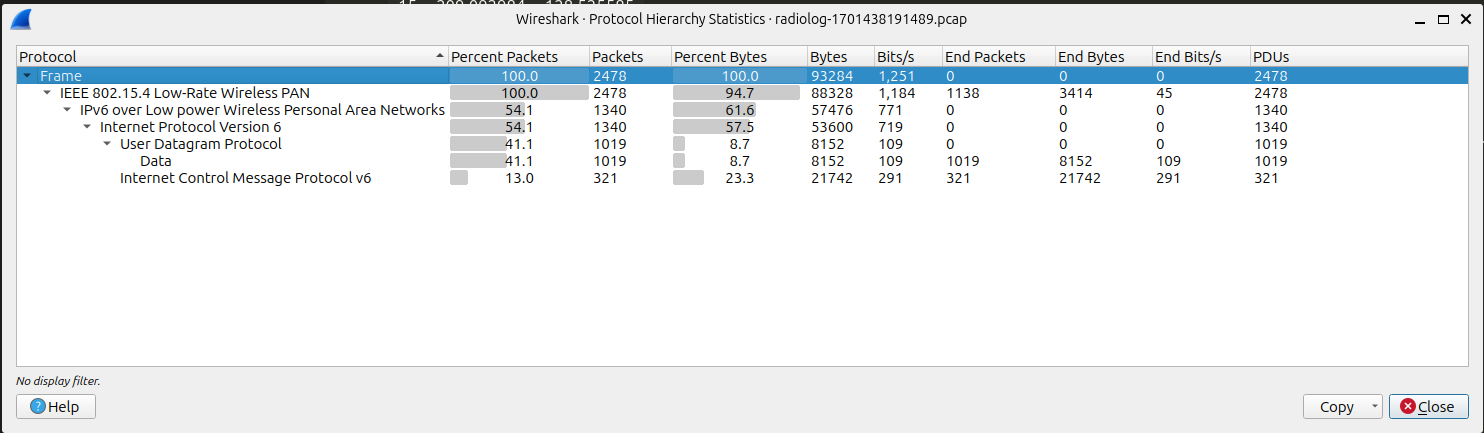

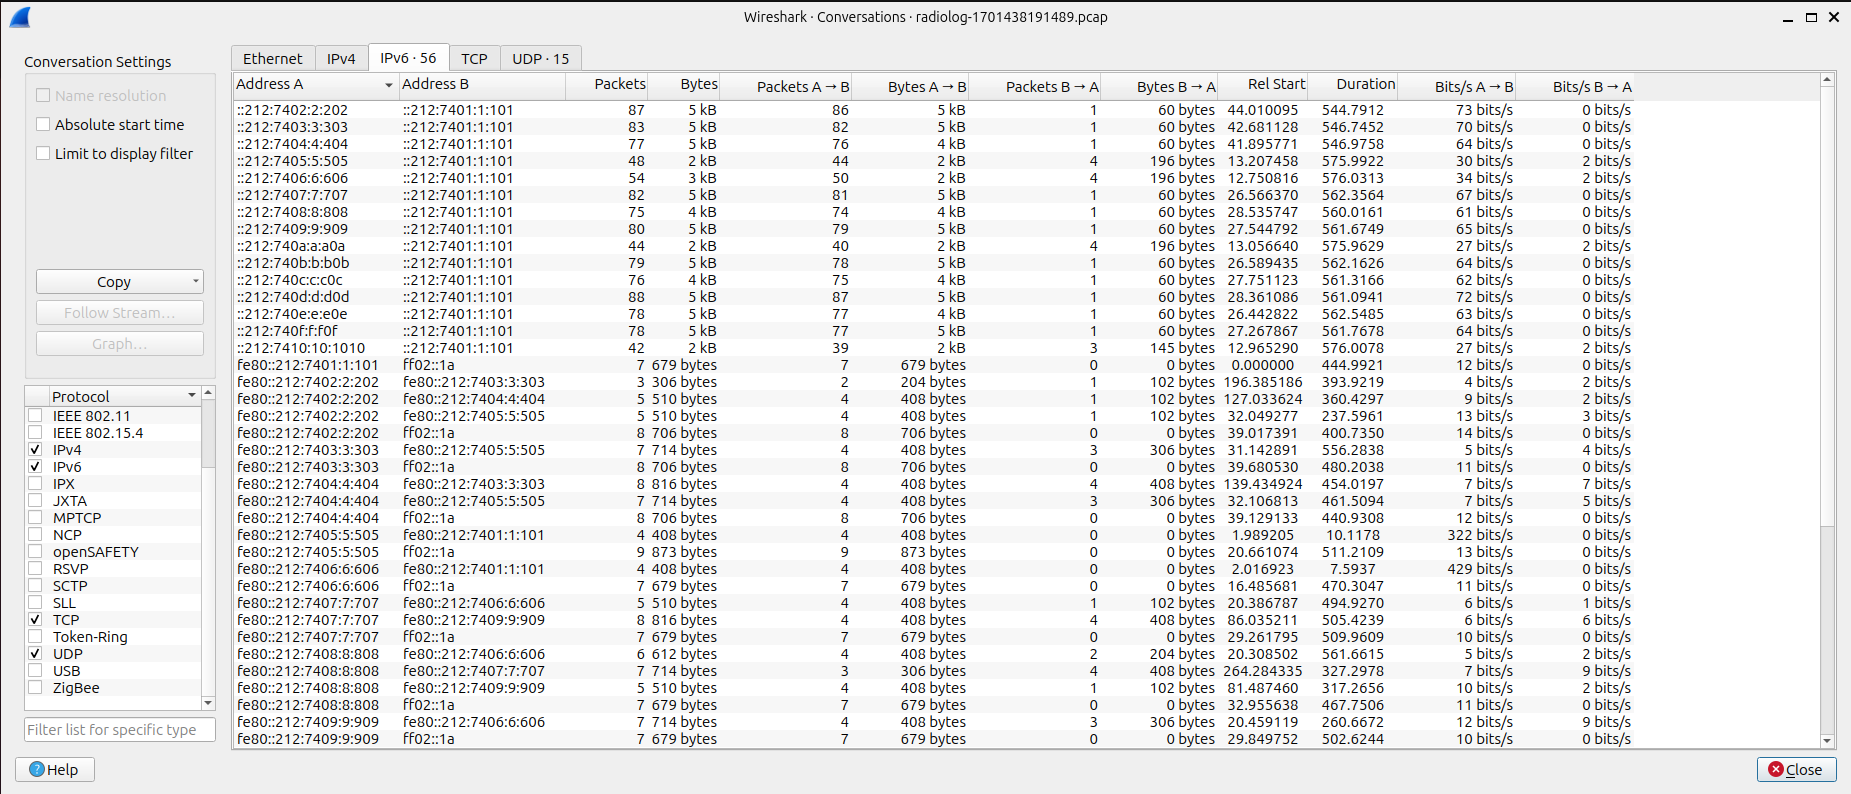

... Bemærk: de sidste 4 bit i adressen er node id.. så op fe80:212:7407:5:505 er node nr 5


Men her kan man se noget med ruterne.. Hvem sender til hvem..

### Experiment 2

Det samme som experiment 1, men nu uden aggregering, til sammenligning

## Topology 2

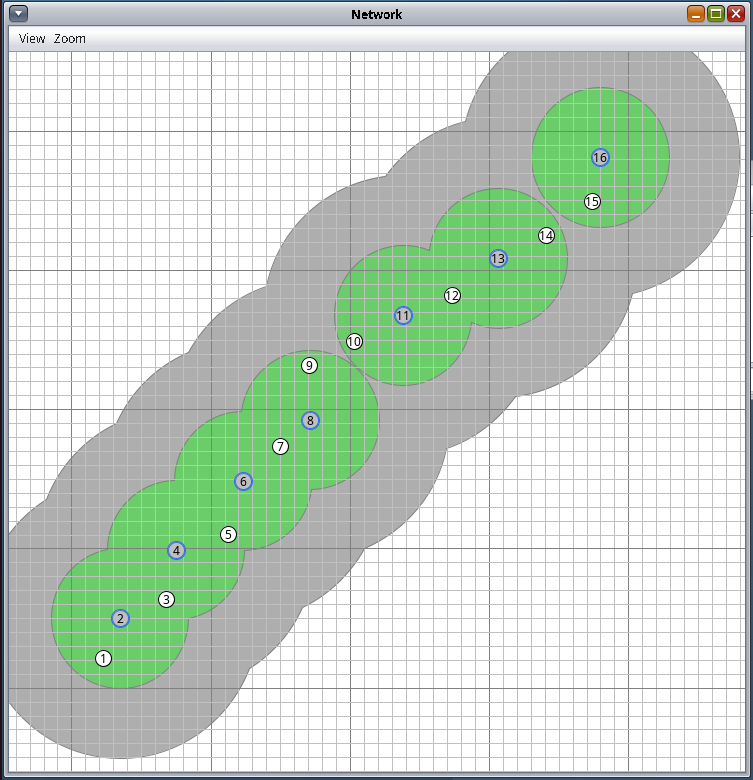

## Experiment 3

Topologi #2, med aggregering

### Experiment 4

Topologi 2 uden aggregering

## Topologi 3

Random

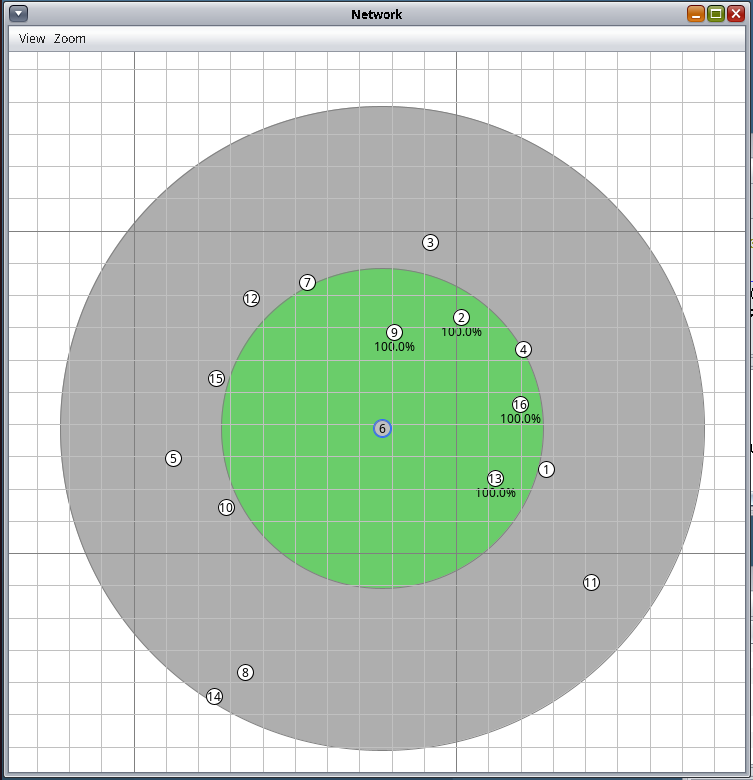

## Experiment 5

Topologi 3 med aggregering

### Experiment 6

Topologi 3 uden aggregering

# Experiments med sampletime

Jeg ændrer på sample tiden (som også er tiden mellem hver gang der sendes målinger videre) så man kan se at der begynder at komme tabte pakker (forhåbentligt) - og forhåbentligt flere når der ikke er aggregering..

### Eksperiment 7

Topologi 1, men hvor jeg løbende sætter sampletiden ned fra 128 ticks (som er et sekund) og ned til 5 tick, som så bliver 5/128 sekund.. Så sender den også oftere og så håber jeg at man kan se at der er tabte pakker.. 

Her med aggregering

##### Eksperiment 8

Samme som 7, men uden aggregering